In [1]:
import numpy as np
import pandas as pd

Loading the dataset

In [2]:
data=pd.read_csv('heart_disease_data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


sex 
1 --> male
0 --> female
cp --> chest pain
trestbps --> resting blood pressure
chol --> cholestrol
fbs --> fasting blood sugar
restecg --> resting electrocardiographic results
thalach --> 
exang --> exercise induced angina
oldpeak --> ST depression induced by exercise relative to rest
slope --> slope of peak exercise St segment
ca --> number of major vessels
thal --> 3-normal , 6-fixed defect , 7-reversable defect

0 --> normal person 
1 --> person with heart disease

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.shape

(303, 14)

Checking for null values

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null value in the data

Checking for duplicate values

In [8]:
data.duplicated().sum()

np.int64(1)

There is 1 duplicate entry

Droping the duplicate entry

In [9]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(302, 14)

Finding the correlation between columns

In [12]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [13]:
data.corr()['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

Each column has some effect on target column

Data Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='age'>

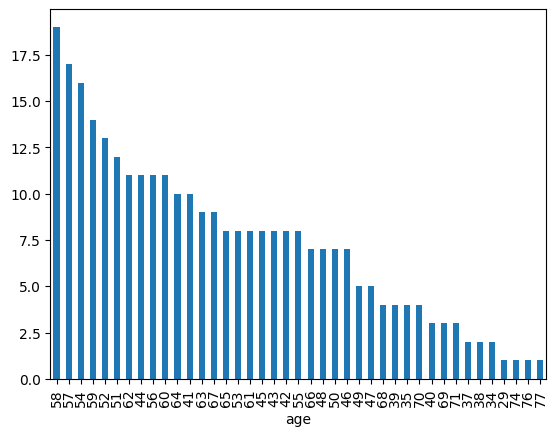

In [15]:
data['age'].value_counts().plot(kind='bar')

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\3262849815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

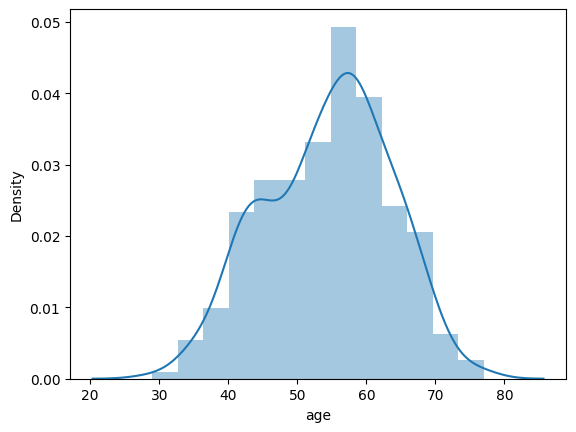

In [16]:
sns.distplot(data['age'])

<Axes: xlabel='sex'>

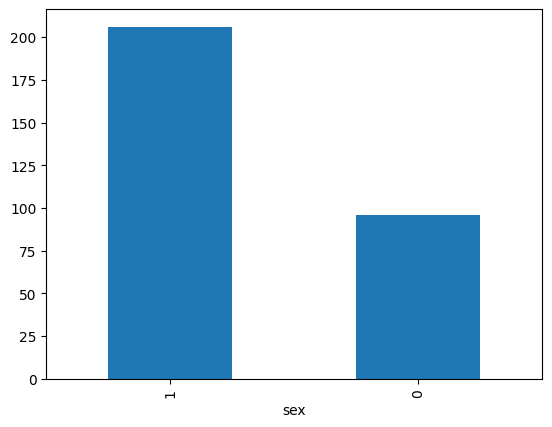

In [17]:
data['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='cp'>

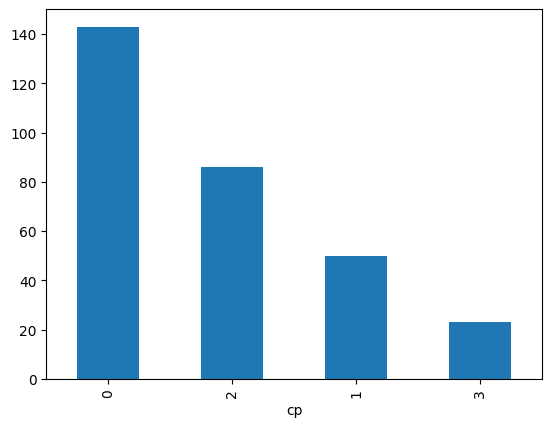

In [18]:
data['cp'].value_counts().plot(kind='bar')

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\402336990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cp'])


<Axes: xlabel='cp', ylabel='Density'>

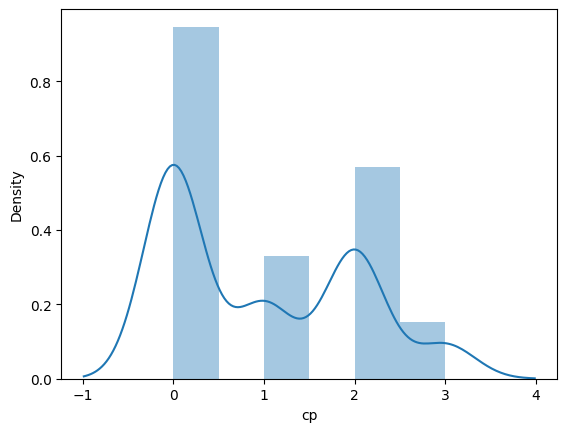

In [19]:
sns.distplot(data['cp'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\3742937086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trestbps'])


<Axes: xlabel='trestbps', ylabel='Density'>

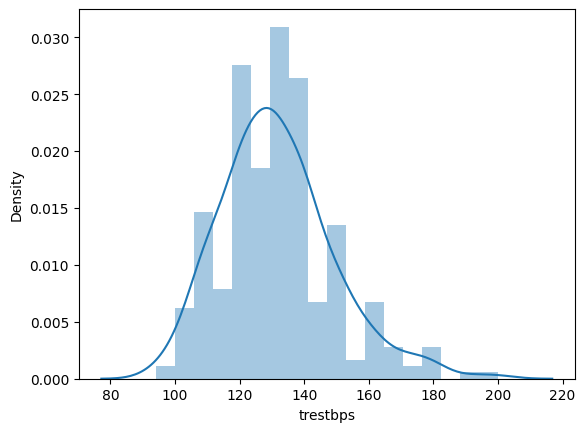

In [20]:
sns.distplot(data['trestbps'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\3249252865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['chol'])


<Axes: xlabel='chol', ylabel='Density'>

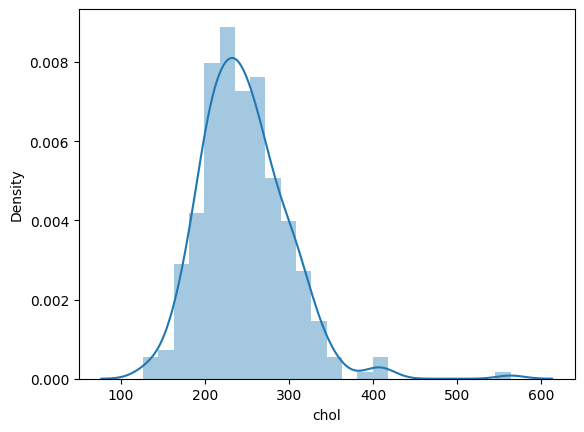

In [21]:
sns.distplot(data['chol'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\3003415867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fbs'])


<Axes: xlabel='fbs', ylabel='Density'>

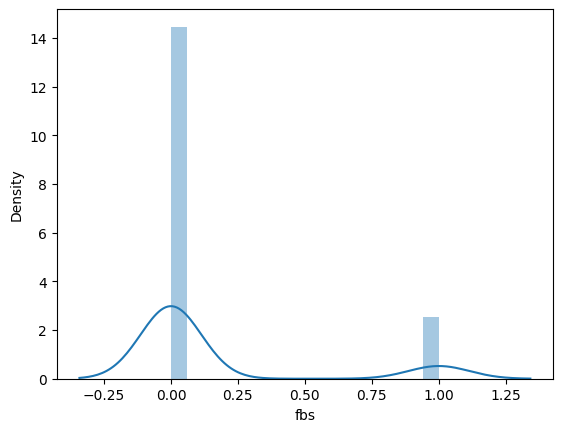

In [22]:
sns.distplot(data['fbs'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\539003532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['restecg'])


<Axes: xlabel='restecg', ylabel='Density'>

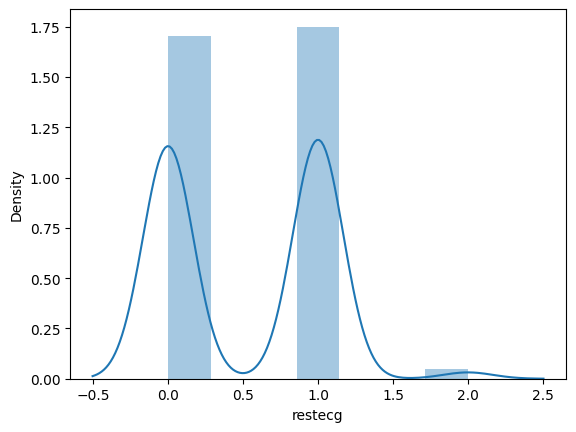

In [23]:
sns.distplot(data['restecg'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\233522014.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['thalach'])


<Axes: xlabel='thalach', ylabel='Density'>

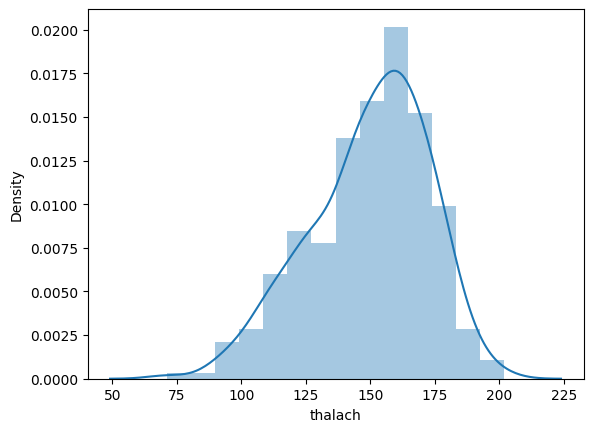

In [24]:
sns.distplot(data['thalach'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\515908859.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['exang'])


<Axes: xlabel='exang', ylabel='Density'>

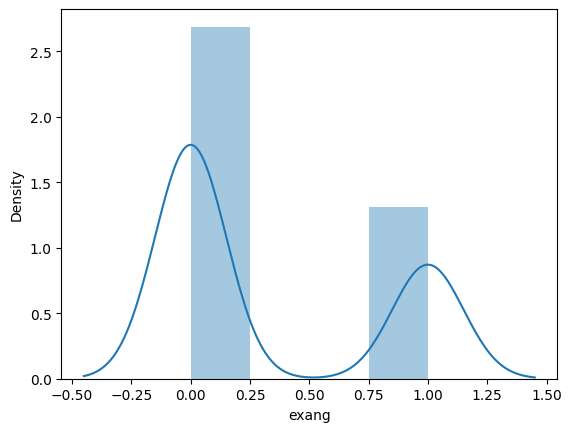

In [25]:
sns.distplot(data['exang'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\225445032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['oldpeak'])


<Axes: xlabel='oldpeak', ylabel='Density'>

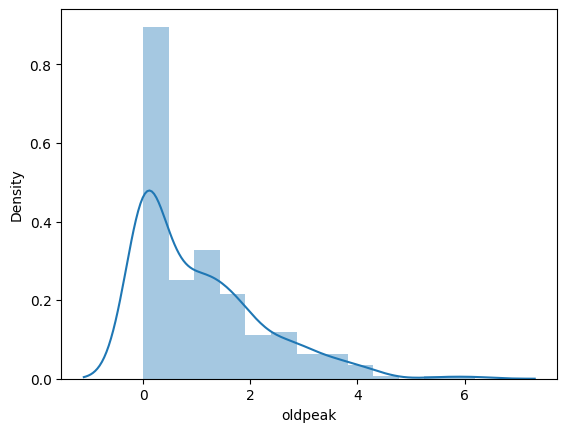

In [26]:
sns.distplot(data['oldpeak'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\3422055646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['slope'])


<Axes: xlabel='slope', ylabel='Density'>

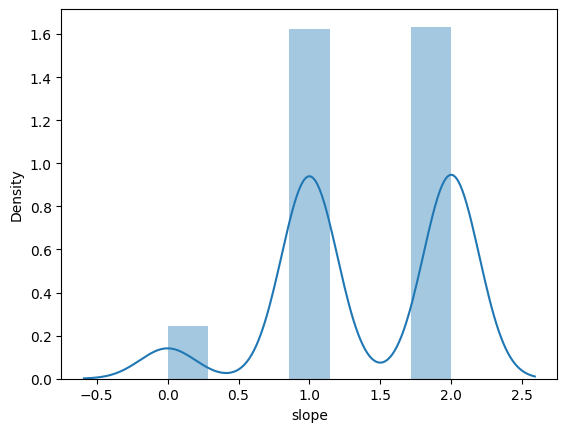

In [27]:
sns.distplot(data['slope'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\266869460.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ca'])


<Axes: xlabel='ca', ylabel='Density'>

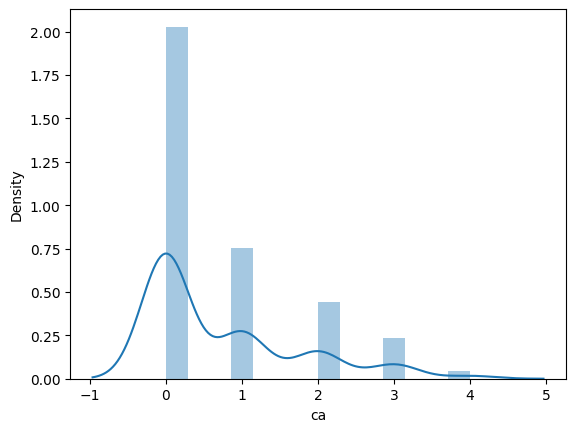

In [28]:
sns.distplot(data['ca'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_5288\4245757518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['thal'])


<Axes: xlabel='thal', ylabel='Density'>

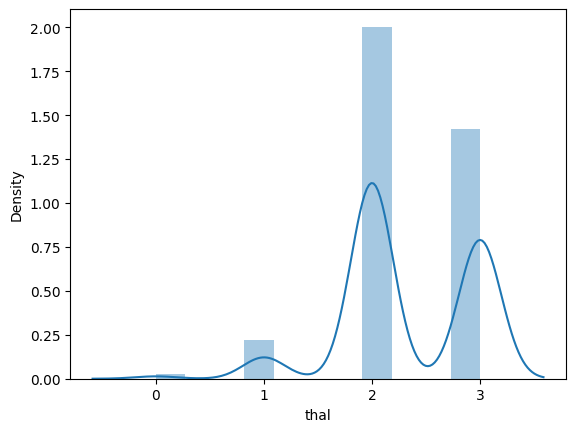

In [29]:
sns.distplot(data['thal'])

<Axes: xlabel='target'>

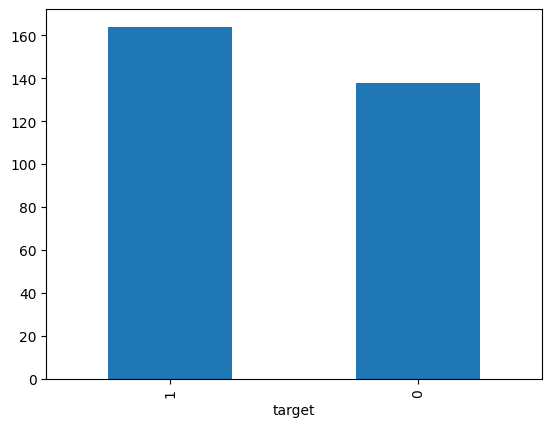

In [30]:
data['target'].value_counts().plot(kind='bar')

There are almost same number of 1 and 0 and therefore data is not imbalanced

<Axes: xlabel='target', ylabel='age'>

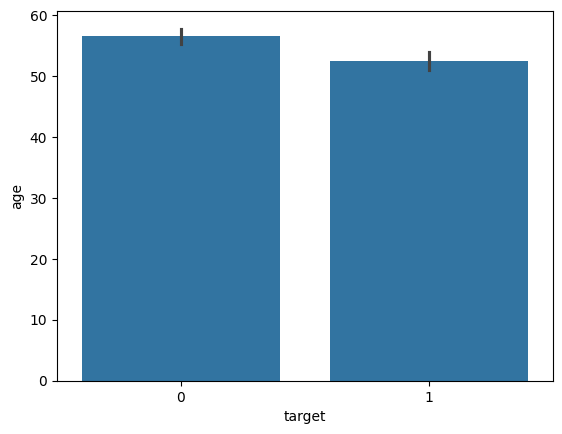

In [31]:
sns.barplot(x=data['target'],y=data['age'])

<Axes: xlabel='target', ylabel='sex'>

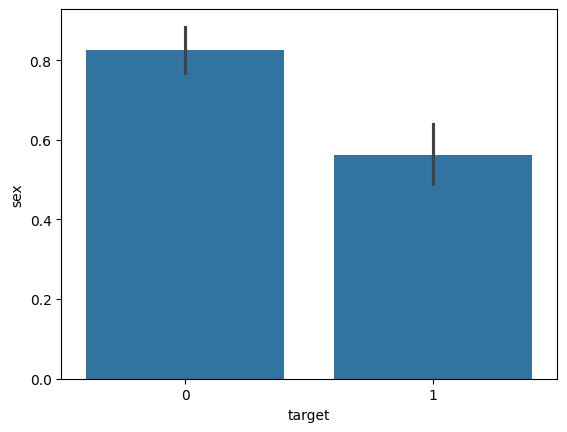

In [32]:
sns.barplot(x=data['target'],y=data['sex'])

<Axes: xlabel='target', ylabel='cp'>

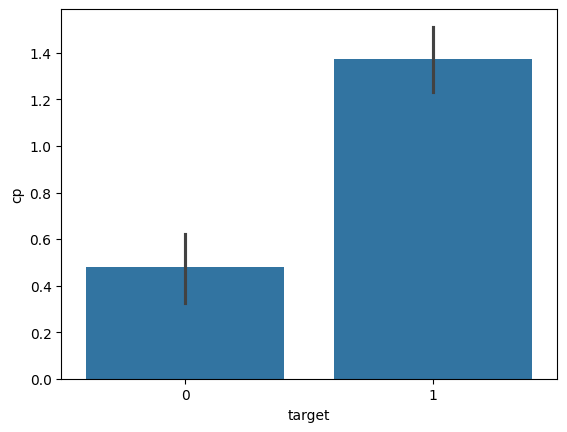

In [33]:
sns.barplot(x=data['target'],y=data['cp'])

<Axes: xlabel='target', ylabel='trestbps'>

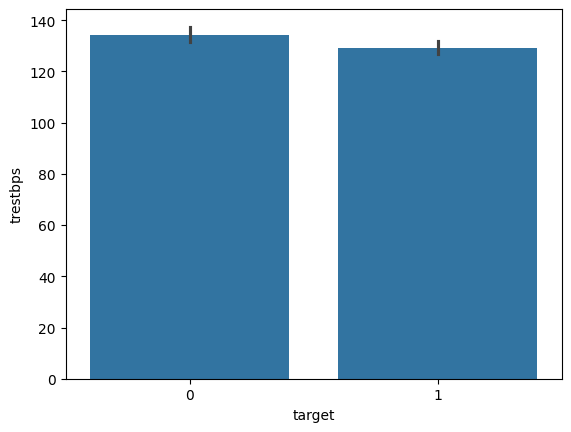

In [34]:
sns.barplot(x=data['target'],y=data['trestbps'])

<Axes: xlabel='target', ylabel='chol'>

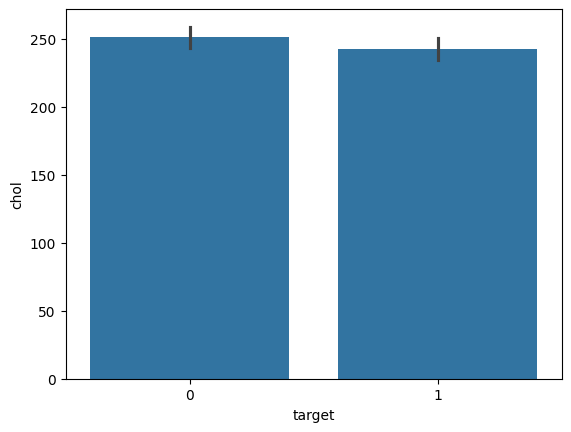

In [35]:
sns.barplot(x=data['target'],y=data['chol'])

<Axes: xlabel='target', ylabel='fbs'>

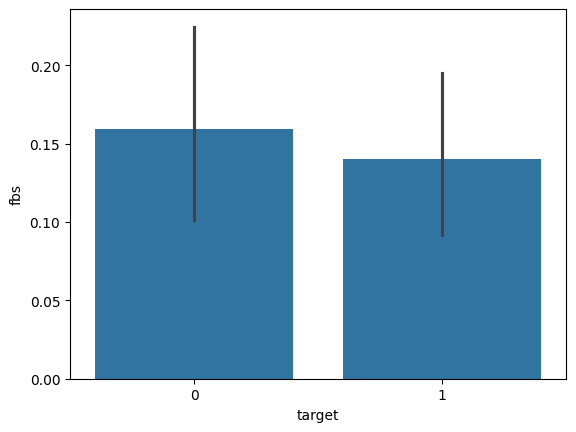

In [36]:
sns.barplot(x=data['target'],y=data['fbs'])

<Axes: xlabel='target', ylabel='restecg'>

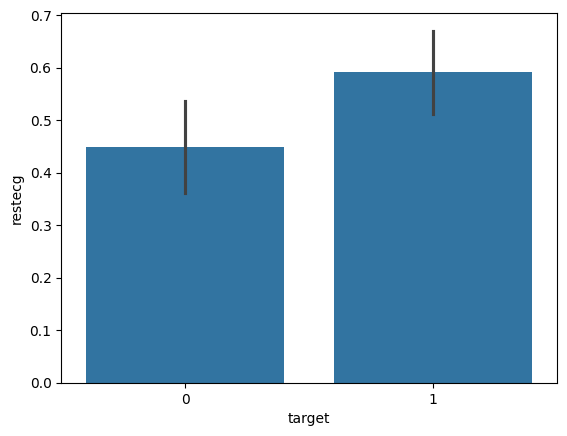

In [37]:
sns.barplot(x=data['target'],y=data['restecg'])

<Axes: xlabel='target', ylabel='thalach'>

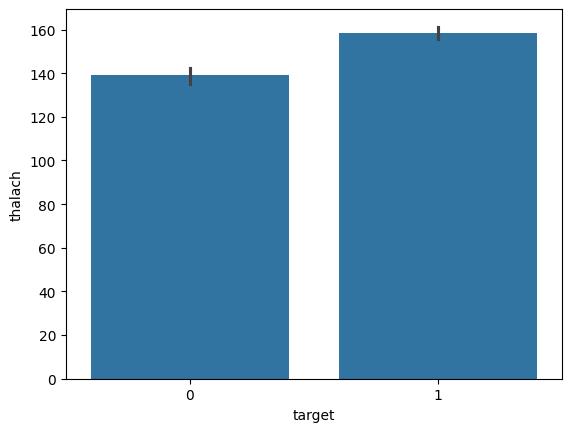

In [38]:
sns.barplot(x=data['target'],y=data['thalach'])

<Axes: xlabel='target', ylabel='exang'>

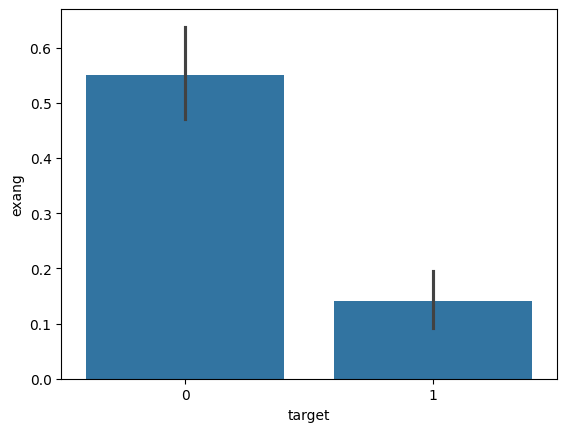

In [39]:
sns.barplot(x=data['target'],y=data['exang'])

<Axes: xlabel='target', ylabel='oldpeak'>

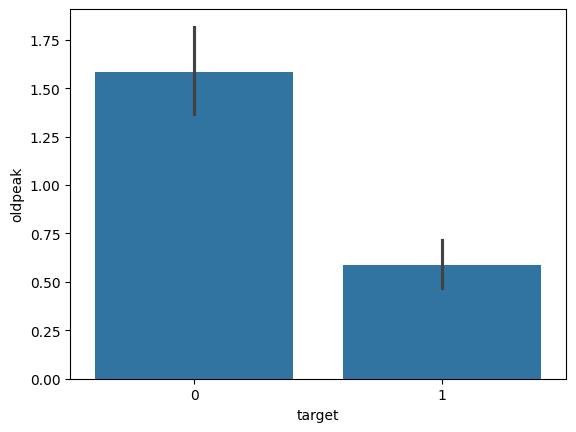

In [40]:
sns.barplot(x=data['target'],y=data['oldpeak'])

<Axes: xlabel='target', ylabel='slope'>

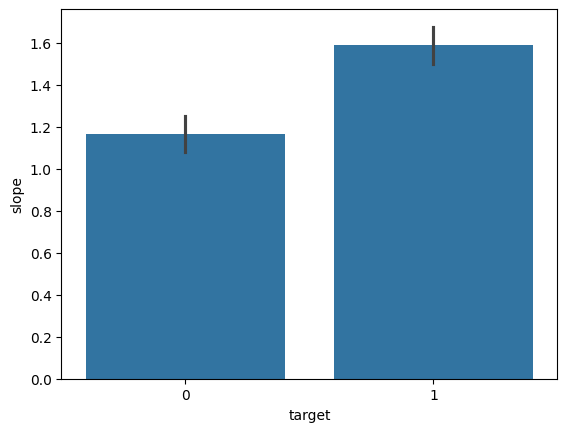

In [41]:
sns.barplot(x=data['target'],y=data['slope'])

<Axes: xlabel='target', ylabel='ca'>

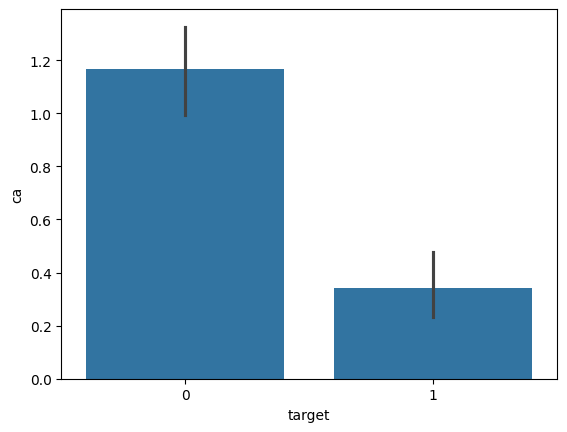

In [42]:
sns.barplot(x=data['target'],y=data['ca'])

<Axes: xlabel='target', ylabel='thal'>

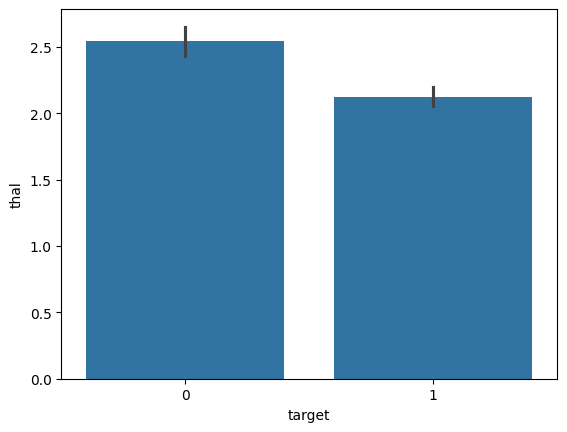

In [43]:
sns.barplot(x=data['target'],y=data['thal'])

Extracting the X and Y

In [44]:
X=data.drop(columns=['target'])
Y=data['target']

In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [46]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

stratify -->  Y means in even quantity 1 and 0 will be in X_test...

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=2)

In [49]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [50]:
Y_train

153    1
147    1
28     1
271    0
156    1
      ..
104    1
79     1
300    0
194    0
91     1
Name: target, Length: 256, dtype: int64

Importing all the models used

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [52]:
import optuna
from sklearn.metrics import accuracy_score

Creating the objective function

In [53]:
def objective(trial):
    
    # Choose a model randomly based on Optuna's suggestion
    type = trial.suggest_categorical('model_type', ['LogisticRegression', 'RandomForest', 'XGBoost', 'DecisionTree', 'SVM'])
    
    if type == 'LogisticRegression':
        C = trial.suggest_float('C', 1e-5, 100,log=True)
        model = LogisticRegression(C=C, max_iter=1000)
    
    elif type == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    elif type == 'XGBoost':
        max_depth = trial.suggest_int('max_depth', 3, 20)
        learning_rate = trial.suggest_float('learning_rate', 1e-5, 0.1,log=True)
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
    
    elif type == 'DecisionTree':
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    
    else:  # SVM
        C = trial.suggest_float('C', 1e-5, 100,log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        model = SVC(C=C, kernel=kernel, probability=True)
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    acc = accuracy_score(Y_test, Y_pred)
    
    # Return the evaluation metric (Optuna will try to maximize this value)
    return acc  # or you can choose accuracy if you prefer that as the objective


Creating a study

In [54]:
study = optuna.create_study(direction='maximize')  # Mazimising Accuracy score
study.optimize(objective, n_trials=100)

[I 2025-01-06 21:47:14,294] A new study created in memory with name: no-name-52863ad9-29f1-4bdb-877d-504be4f8fff2
[I 2025-01-06 21:47:14,503] Trial 0 finished with value: 0.782608695652174 and parameters: {'model_type': 'LogisticRegression', 'C': 0.18229504874714172}. Best is trial 0 with value: 0.782608695652174.
[I 2025-01-06 21:47:14,804] Trial 1 finished with value: 0.7608695652173914 and parameters: {'model_type': 'RandomForest', 'n_estimators': 91, 'max_depth': 19}. Best is trial 0 with value: 0.782608695652174.
[I 2025-01-06 21:47:14,816] Trial 2 finished with value: 0.6739130434782609 and parameters: {'model_type': 'DecisionTree', 'max_depth': 9, 'min_samples_split': 10}. Best is trial 0 with value: 0.782608695652174.
[I 2025-01-06 21:47:14,876] Trial 3 finished with value: 0.6521739130434783 and parameters: {'model_type': 'LogisticRegression', 'C': 0.0014326003987059884}. Best is trial 0 with value: 0.782608695652174.
[I 2025-01-06 21:47:17,051] Trial 4 finished with value: 0.

Print the best hyperparameters and score

In [55]:
print(f"Best trial: {study.best_trial.params}")

Best trial: {'model_type': 'RandomForest', 'n_estimators': 10, 'max_depth': 15}


In [56]:
print(f"Best Accuracy Score: {study.best_value}")

Best Accuracy Score: 0.8260869565217391
